In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression

%matplotlib inline


In [2]:
# df = pd.read_csv("houses_unemployed_old.csv")
# df.info()
df = pd.read_csv("./data/houses_unemployed_new(2-5olde1.2).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371779 entries, 0 to 371778
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  371779 non-null  object 
 1   neighborhoods         371779 non-null  object 
 2   date                  371779 non-null  object 
 3   address               371779 non-null  object 
 4   helka                 371779 non-null  object 
 5   kind                  371779 non-null  object 
 6   rooms                 371779 non-null  float64
 7   floor                 371779 non-null  int64  
 8   size                  371779 non-null  float64
 9   price                 371779 non-null  float64
 10  day                   371779 non-null  int64  
 11  month                 371779 non-null  int64  
 12  year                  371779 non-null  int64  
 13  street                371779 non-null  object 
 14  number                371779 non-null  int64  
 15  

In [3]:
# df= df[df['city'].str.contains("ירושלים")]
# df.sort_values(by='date_sale', ascending=True, inplace=True)
# df1= df1[df1['city'].str.contains("ירושלים")]
df.sort_values(by='date_sale', ascending=True, inplace=True)
df

,city,neighborhoods,date,address,helka,kind,rooms,floor,size,price,day,month,year,street,number,date_sale,prime,unemployment_precent
368411,קריית ביאליק,מרכז העיר,01.01.1998,בן גוריון 56,11554-40-9,דירה בבית קומות,3.0,1,79.00,442000.0,1,1,1998,בן גוריון,56,1998-01-01,14.90,9.011397
368335,הוד השרון,שרת,01.01.1998,משאבים 26,6455-616-37,דירה בבית קומות,3.0,4,69.27,565000.0,1,1,1998,משאבים,26,1998-01-01,14.90,9.011397
366961,חיפה,רמת התשבי,01.01.1998,שומרון 4,11718-15-2,דירה בבית קומות,3.0,1,65.57,638000.0,1,1,1998,שומרון,4,1998-01-01,14.90,9.011397
368685,נתניה,גבע,01.02.1998,בן אליעזר 48,8260-113-1,דירה בבית קומות,4.0,4,100.00,722000.0,1,2,1998,בן אליעזר,48,1998-01-02,14.85,9.011397
366566,גבעתיים,ארלוזרוב,01.02.1998,הכנסת 32,6161-264-73,דירה בבית קומות,2.0,3,48.00,577000.0,1,2,1998,הכנסת,32,1998-01-02,14.85,9.011397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25134,תל אביב -יפו,כוכב הצפון,31.12.2020,"עגנון ש""י 28",6634-336-42,דירה בבית קומות,5.0,11,161.00,9103000.0,31,12,2020,"עגנון ש""י",28,2020-12-31,1.60,4.247013
25132,תל אביב -יפו,יפו העתיקה,31.12.2020,יפת 38,7259-8-52,דירה בבית קומות,5.0,9,208.60,10550000.0,31,12,2020,יפת,38,2020-12-31,1.60,4.247013
25126,תל אביב -יפו,רמת אביב ג,31.12.2020,אחימאיר אבא 1,6631-129-34,דירה בבית קומות,5.0,8,137.00,8391000.0,31,12,2020,אחימאיר אבא,1,2020-12-31,1.60,4.247013
16819,נהרייה,גבעת טרומפלדור,31.12.2020,יהודה המכבי 30,18208-66-4,דירה בבית קומות,2.0,2,36.10,420000.0,31,12,2020,יהודה המכבי,30,2020-12-31,1.60,4.247013


<AxesSubplot:>

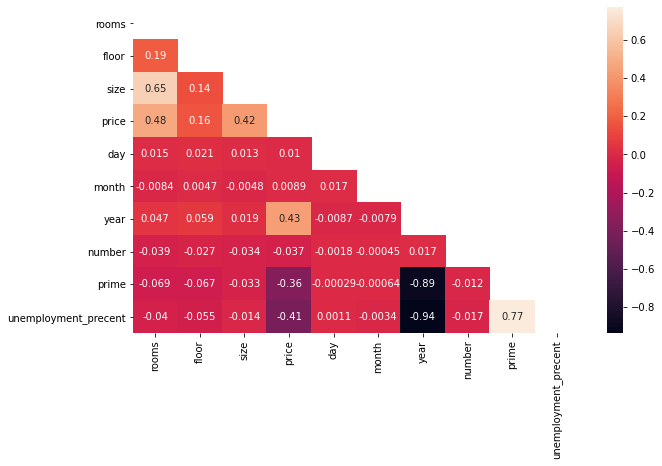

In [4]:
import seaborn as sns
df.corr()
fig, ax = plt.subplots(figsize=(10, 6)) 
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(), mask= mask, ax= ax, annot= True)

In [5]:

df1=pd.get_dummies(df['rooms'], prefix='rooms')
df = pd.concat([df, df1], axis=1)

df1=pd.get_dummies(df['neighborhoods'], prefix='neighborhoods')
df = pd.concat([df, df1], axis=1)

df1=pd.get_dummies(df['kind'], prefix='pre_')
df = pd.concat([df, df1], axis=1)

df1 = df._get_numeric_data()
df1.drop('day',axis="columns", inplace=True)

df1 = df._get_numeric_data()
df1.drop(['number', 'day'],axis="columns", inplace=True)
df1


,rooms,floor,size,price,month,year,prime,unemployment_precent,rooms_2.0,rooms_2.5,...,neighborhoods_תל חנן,neighborhoods_תל עמל,neighborhoods_תלפיות,neighborhoods_תלפיות מזרח,neighborhoods_תקומה,pre__דירה בבית קומות,pre__דירת גן,pre__וילה,pre__פנטהאוז,pre__קוטג'
368411,3.0,1,79.00,442000.0,1,1998,14.90,9.011397,0,0,...,0,0,0,0,0,1,0,0,0,0
368335,3.0,4,69.27,565000.0,1,1998,14.90,9.011397,0,0,...,0,0,0,0,0,1,0,0,0,0
366961,3.0,1,65.57,638000.0,1,1998,14.90,9.011397,0,0,...,0,0,0,0,0,1,0,0,0,0
368685,4.0,4,100.00,722000.0,2,1998,14.85,9.011397,0,0,...,0,0,0,0,0,1,0,0,0,0
366566,2.0,3,48.00,577000.0,2,1998,14.85,9.011397,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25134,5.0,11,161.00,9103000.0,12,2020,1.60,4.247013,0,0,...,0,0,0,0,0,1,0,0,0,0
25132,5.0,9,208.60,10550000.0,12,2020,1.60,4.247013,0,0,...,0,0,0,0,0,1,0,0,0,0
25126,5.0,8,137.00,8391000.0,12,2020,1.60,4.247013,0,0,...,0,0,0,0,0,1,0,0,0,0
16819,2.0,2,36.10,420000.0,12,2020,1.60,4.247013,1,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
df2 = df1.copy()

In [7]:
df2.sort_values(by=['year','month'], ascending=True, inplace=True)
y = df2['unemployment_precent']
X = df2.drop(['unemployment_precent'], axis="columns").copy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [10]:
print(f"med: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"r^2: {metrics.r2_score(y_test, y_pred)}")

med: 0.5645732136822261
r^2: 0.8963057257054416


<AxesSubplot:xlabel='year'>

<Figure size 1440x720 with 0 Axes>

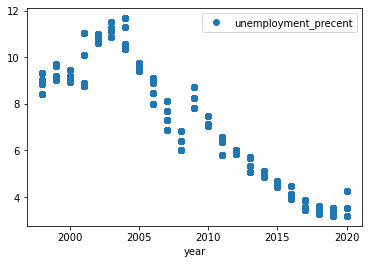

In [11]:
plt.figure(figsize=(20,10))
df2.plot(x='year', y='unemployment_precent', style='o')

In [12]:
arr1 = list(y_pred)
arr2 = list(y_test)
print("   Real === Predicted === Delta === Delta in %")
for i in range(20):
    print(f"{i+1}: {'{:.4}'.format(arr1[i])} ==== {'{:.4}'.format(arr2[i])}", end ='')
    print(f" ==== {'{:.4}'.format(abs(arr1[i]-arr2[i]))} === {'{:.4}'.format(abs(arr1[i]-arr2[i])/arr1[i])}")

   Real === Predicted === Delta === Delta in %
1: 4.286 ==== 3.886 ==== 0.4004 === 0.09341
2: 7.786 ==== 6.038 ==== 1.748 === 0.2245
3: 5.911 ==== 5.854 ==== 0.057 === 0.009643
4: 3.576 ==== 3.635 ==== 0.05819 === 0.01627
5: 6.238 ==== 5.801 ==== 0.4375 === 0.07013
6: 3.199 ==== 3.635 ==== 0.436 === 0.1363
7: 3.094 ==== 3.208 ==== 0.1141 === 0.03687
8: 4.535 ==== 4.127 ==== 0.4084 === 0.09005
9: 4.932 ==== 4.71 ==== 0.2222 === 0.04505
10: 9.966 ==== 9.456 ==== 0.5095 === 0.05113
11: 5.428 ==== 5.031 ==== 0.3975 === 0.07323
12: 4.439 ==== 4.482 ==== 0.04324 === 0.00974
13: 10.15 ==== 9.175 ==== 0.9742 === 0.09599
14: 6.968 ==== 7.061 ==== 0.09287 === 0.01333
15: 5.071 ==== 4.42 ==== 0.6512 === 0.1284
16: 5.088 ==== 4.518 ==== 0.5705 === 0.1121
17: 5.017 ==== 4.71 ==== 0.3067 === 0.06113
18: 10.05 ==== 8.9 ==== 1.152 === 0.1146
19: 2.56 ==== 4.247 ==== 1.687 === 0.6588
20: 3.895 ==== 3.56 ==== 0.3357 === 0.08617


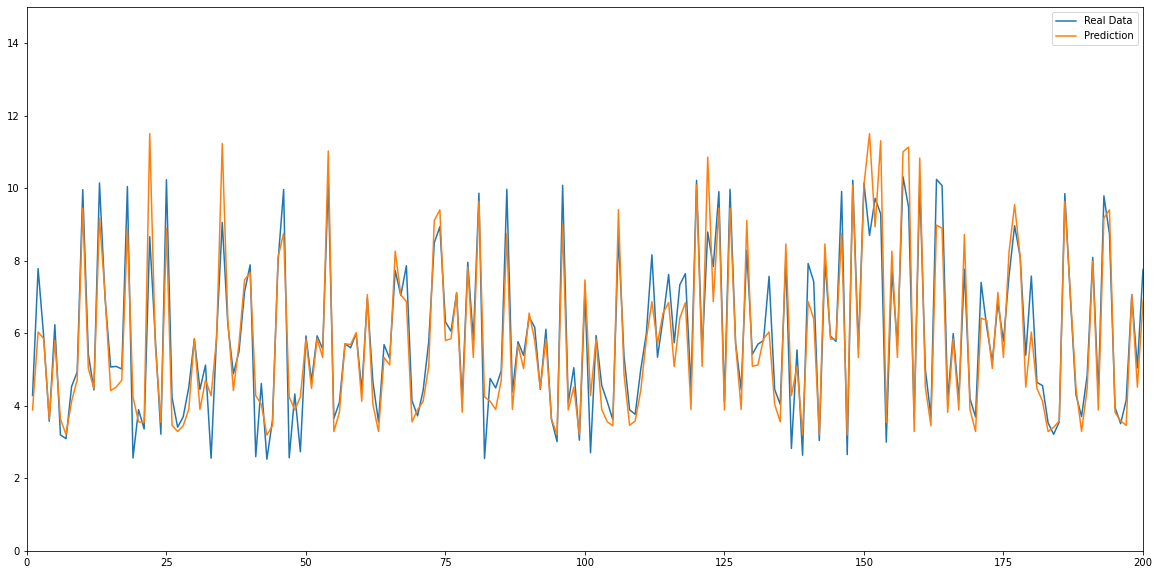

In [13]:
plt.figure(figsize=(20,10))
plt.plot(range(1,74357,1),arr1, label = "Real Data")
plt.plot(range(1,74357,1),arr2, label = "Prediction")
plt.xlim(0, 200)
plt.ylim(0, 15)
plt.legend()
plt.show()